In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
class KMeans:
    '''        
    A class to perform K-Means clustering.
    Contains methods to perform the clustering process, with commented explanations on each step.

    Attributes:
        num_centroids (int): Number of centroids to use for the clustering process.
        cluster_centroids (numpy.ndarray): Cluster centers after the clustering process.

    Methods:
        distance_to_centroids(point, centers): 
            Calculate the Euclidean distance from a given point to all cluster centers.
            Returns a numpy.ndarray of distances.
        perform_clustering(data, max_iter=200): 
            Perform clustering on the given dataset.
            data (numpy.ndarray): Dataset for clustering.
            max_iter (int): Maximum number of iterations for the clustering process (default is 200).
            Returns a numpy.ndarray of cluster assignments for each data point.

    Example:
        >>> kmeans = KMeans(num_centroids=3)
        >>> clusters = kmeans.perform_clustering(data)

    '''
    def __init__(self, num_centroids=3):
        # Initialize the KMeans class with a specified number of centroids.
        # Default number of centroids is set to 3.
        self.num_centroids = num_centroids
        # Initialize cluster centroids as None.
        self.cluster_centroids = None

    @staticmethod
    def distance_to_centroids(point, centers):
        return np.sqrt(np.sum((centers - point) ** 2, axis=1))

    def perform_clustering(self, data, max_iter=200):
        self.cluster_centroids = np.random.uniform(np.amin(data, axis=0), np.amax(data, axis=0), 
                                                size=(self.num_centroids, data.shape[1]))
        
        # Initialize the cluster assignments
        assigned_clusters = np.full(shape=data.shape[0], fill_value=-1)
        
        for iteration in range(max_iter):
            # List to store the cluster number each data point is assigned to.
            new_assigned_clusters = []

            for point in data:
                distances = KMeans.distance_to_centroids(point, self.cluster_centroids)
                closest_cluster = np.argmin(distances)
                new_assigned_clusters.append(closest_cluster)
            
            new_assigned_clusters = np.array(new_assigned_clusters)
            
            # Check if the cluster assignments have changed
            if np.array_equal(new_assigned_clusters, assigned_clusters):
                print("Convergence reached at iteration", iteration)
                break
            
            # Update the assigned clusters
            assigned_clusters = new_assigned_clusters
            
            # Plot the data points and the current cluster centers.
            plt.scatter(data[:, 0], data[:, 1], c=assigned_clusters, alpha=0.5)
            plt.scatter(self.cluster_centroids[:, 0], self.cluster_centroids[:, 1], c='red', marker='*', s=200)
            plt.title(f'Iteration {iteration + 1}')
            plt.show(block=False)
            plt.pause(0.5)
            plt.clf()
            
            # Calculate new centroids
            cluster_group_indices = [np.argwhere(assigned_clusters == i).flatten() for i in range(self.num_centroids)]
            new_cluster_centroids = np.array([data[indices].mean(axis=0) if len(indices) > 0 else self.cluster_centroids[i] 
                                            for i, indices in enumerate(cluster_group_indices)])
            
            self.cluster_centroids = new_cluster_centroids
            
        # Show the final plot
        plt.scatter(data[:, 0], data[:, 1], c=assigned_clusters, alpha=0.5)
        plt.scatter(self.cluster_centroids[:, 0], self.cluster_centroids[:, 1], c='red', marker='*', s=200)
        plt.title('Final Clustering')
        plt.show()

        return assigned_clusters


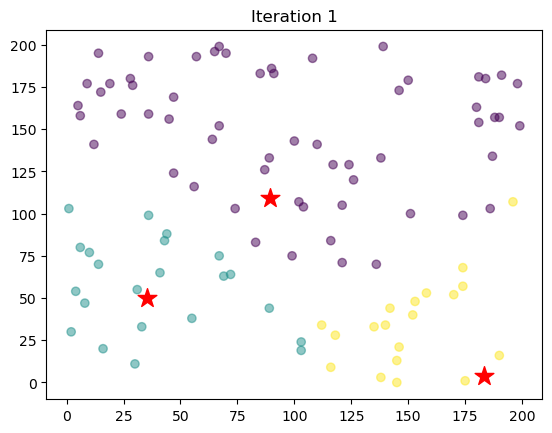

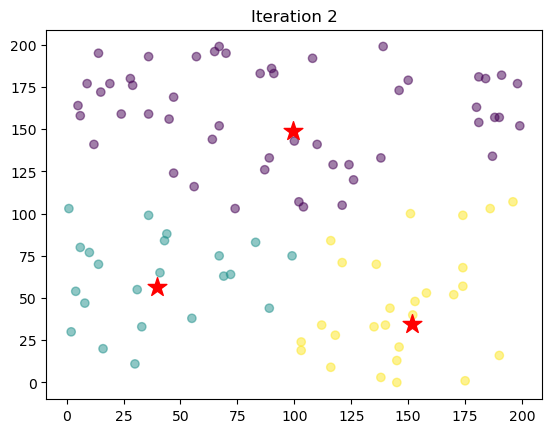

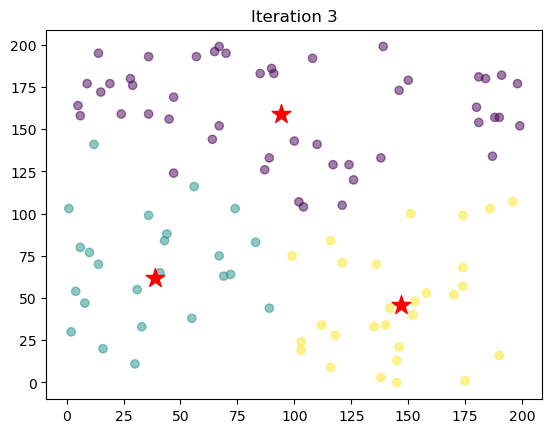

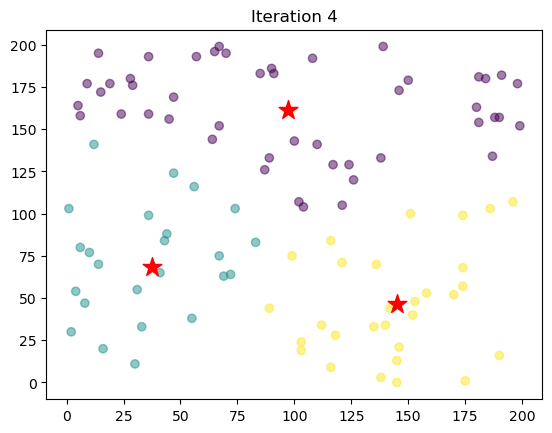

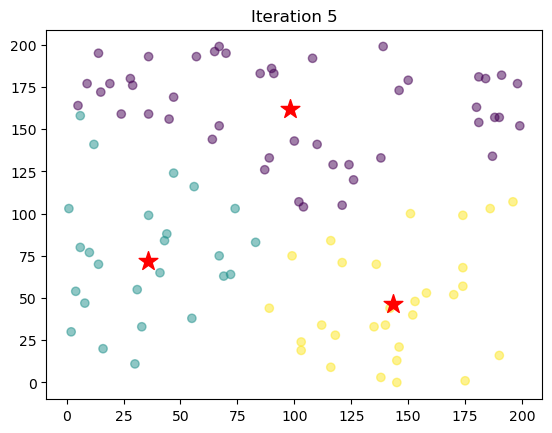

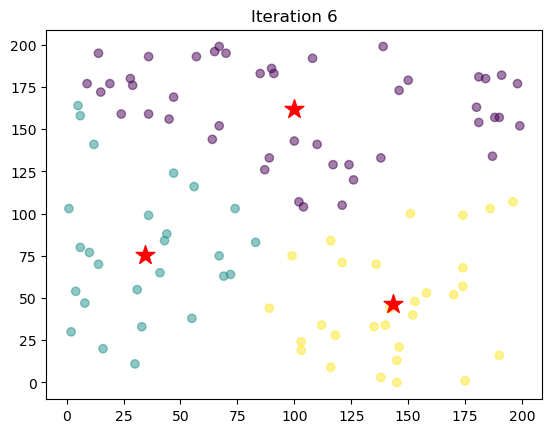

Convergence reached at iteration 6


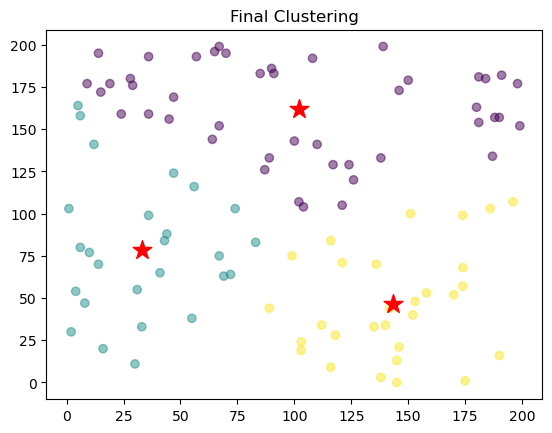

In [31]:
# Generating random points for clustering
random_points =  np.random.randint(0, 200, (100, 2))

# Creating an instance of the KMeans class
kmeans = KMeans(num_centroids=3)

# Performing clustering on the random points
labels = kmeans.perform_clustering(random_points)